 # Case Study : Telecom Churn Case Study
 Abhijeet Srivastava
 Sanya Saxena 

## Problem Statement
### Business problem overivew <br>
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, **customer retention** has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn.**

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Understanding and defining churn<br>
There are two main models of payment in the telecom industry - **`postpaid`** (customers pay a monthly/annual bill after using the services) and **`prepaid`** (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

*This project is based on the Indian and Southeast Asian market.*

### Definitions of churn<br>
There are various ways to define churn, such as:

**`Revenue-based churn`**: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

**`Usage-based churn`**: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, we will use the **`usage-based definition`** to define churn.

### High-value churn<br>
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, we will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.
 
### Understanding the business objective and the data<br>
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### Understanding customer behaviour during churn <br>
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are **`three phases of customer lifecycle`** :

- The ***`‘good’`*** phase: In this phase, the customer is happy with the service and behaves as usual.

- The ***`‘action’`*** phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

- The ***`‘churn’`*** phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after **`tagging churn as 1/0 based on this phase`**, you discard all data corresponding to this phase.

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase

## Loading Modules & Libraries 

In [1]:
#importing libraries 
import pandas as pd
import numpy as np

from scipy import special 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation
import seaborn as sns
import math
from IPython.display import Markdown, display ,HTML

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import RobustScaler
 
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

# supressing the warnings generated
import warnings
warnings.filterwarnings('ignore')

# displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

# float value display 
pd.options.display.float_format = '{:20,.2f}'.format 

## Utitlity Functions 

In [2]:
def log(string):
    display(Markdown("> <span style='color:blue'>"+string+"</span>"))
    

def plot_data_type_pie_chat(dataframe) : 
    header("Stats for Datatype Percentage Distribution")
    dataframe_group = dataframe.groupby("Datatype").frequency.count().reset_index()
    dataframe_group.sort_values(["Datatype"], axis=0,ascending=False, inplace=True)
    trace = go.Pie(labels=dataframe_group["Datatype"].tolist(), values=dataframe_group["frequency"].tolist())
    layout = go.Layout(title="Datatype Percentage Distribution")
    fig = go.Figure(data=[trace], layout=layout)    
    py.offline.iplot(fig)
    

        

## Reading and understanding dataset 

In [3]:
telecom_df = pd.read_csv("telecom_churn_data.csv")
telecom_df.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,Na

In [4]:
#checking the shape of the datset
telecom_df.shape

(99999, 226)

Dataset has 99,999 rows and 226 columns

In [5]:
#basic information of the dataset
telecom_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

INSIGHT: All the date related columns have type object, need to be converted to datetime format

In [6]:
#basic statistical information of numerical columns 
telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.00","99,999.00","98,981.00","98,981.00","98,981.00","99,999.00","99,999.00","99,999.00","99,999.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00",

In [7]:
#checking the missing values 
round((telecom_df.isnull().sum()/len(telecom_df)*100),2).sort_values(ascending=False)

arpu_3g_6                                 74.85
night_pck_user_6                          74.85
total_rech_data_6                         74.85
arpu_2g_6                                 74.85
max_rech_data_6                           74.85
fb_user_6                                 74.85
av_rech_amt_data_6                        74.85
date_of_last_rech_data_6                  74.85
count_rech_2g_6                           74.85
count_rech_3g_6                           74.85
date_of_last_rech_data_7                  74.43
total_rech_data_7                         74.43
fb_user_7                                 74.43
max_rech_data_7                           74.43
night_pck_user_7                          74.43
count_rech_2g_7                           74.43
av_rech_amt_data_7                        74.43
arpu_2g_7                                 74.43
count_rech_3g_7                           74.43
arpu_3g_7                                 74.43
total_rech_data_9                       

A lot of the columns have missing values that need to be imputed based on the data dictionary before taking a decision to drop the columns or not .

## Data Cleaning and Preparation 
### 1.  Exploring cols

In [8]:
#extracting columns relating to recharge amount
amt_rech_cols =  telecom_df.columns[telecom_df.columns.str.contains('rech_amt|rech_data')]
print(amt_rech_cols)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


Insight: From above columns we can derive more meaningful info:
- Total recharge amount
- Total recharge for data
- Maximum recharge amount 
- Last date of recharging the data
- Average recharge amount for data
- Maximum recharge for data

In [9]:
# Checking missing values percentages for rech amt cols 
telecom_df_null = (telecom_df.loc[:,amt_rech_cols].isnull().sum()/len(telecom_df))*100

df = pd.DataFrame(telecom_df_null)
df.rename(columns={0:'Missing_Percentage'}, inplace=True)

print(df)

                           Missing_Percentage
total_rech_amt_6                         0.00
total_rech_amt_7                         0.00
total_rech_amt_8                         0.00
total_rech_amt_9                         0.00
max_rech_amt_6                           0.00
max_rech_amt_7                           0.00
max_rech_amt_8                           0.00
max_rech_amt_9                           0.00
date_of_last_rech_data_6                74.85
date_of_last_rech_data_7                74.43
date_of_last_rech_data_8                73.66
date_of_last_rech_data_9                74.08
total_rech_data_6                       74.85
total_rech_data_7                       74.43
total_rech_data_8                       73.66
total_rech_data_9                       74.08
max_rech_data_6                         74.85
max_rech_data_7                         74.43
max_rech_data_8                         73.66
max_rech_data_9                         74.08
av_rech_amt_data_6                

Insgiht: We can see more then **74%** values for **recharge** related data are missing.

In [10]:
#basic statistical info 
telecom_df.loc[:,amt_rech_cols].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,"99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","25,153.00","25,571.00","26,339.00","25,922.00","25,153.00","25,571.00","26,339.00","25,922.00","25,153.00","25,571.00","26,339.00","25,922.00"
mean,327.51,322.96,324.16,303.35,104.64,104.75,107.73,101.94,2.46,2.67,2.65,2.44,126.39,126.73,125.72,124.94,192.60,200.98,197.53,192.73
std,398.02,408.11,416.54,404.59,120.61,124.52,126.90,125.38,2.79,3.03,3.07,2.52,108.48,109.77,109.44,111.36,192.65,196.79,191.30,188.40
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.50,0.50,1.00
25%,109.00,100.00,90.00,52.00,30.00,30.00,30.00,28.00,1.00,1.00,1.00,1.00,25.00,25.00,25.00,25.00,82.00,92.00,87.00,69.00
50%,230.00,220.00,225.00,200.00,110.00,110.00,98.00,61.00,1.00,1.00,1.00,2.00,145.00,145.00,145.00,145.00,154.00,154.00,154.00,164.00
75%,437.50,428.00,434.50,415.00,120.00,128.00,144.00,144.00,3.00,3.00,3.00,3.00,177.00,177.00,179.00,179.00,252.00,252.00,252.00,252.00
max,"35,190.00","40,335.00","45,320.00","37,235.00","4,010.00","4,010.00","4,449.00","3,399.00",61.00,54.00,60.00,84.00,"1,555.00","1,555.00","1,555.00","1,555.00","7,546.00","4,365.00","4,076.00","4,061.00"


Insight:
1. We can create new column as **total_rech_amt_data** using **total_rech_data** and **av_rech_amt_data** to capture amount utilized by customer for data.
2. Also as the minimum value is 1 we can impute the NaN values with 0, since there were any recharges done by the customer.

In [11]:
#imputing 0 for NaN total_rech_data_x
telecom_df['total_rech_data_6'] = telecom_df['total_rech_data_6'].replace(np.NaN,0.0)
telecom_df['total_rech_data_7'] = telecom_df['total_rech_data_7'].replace(np.NaN,0.0)
telecom_df['total_rech_data_8'] = telecom_df['total_rech_data_8'].replace(np.NaN,0.0)
#imputing 0 for NaN avg_rech_amt_data_x
telecom_df['av_rech_amt_data_6'] = telecom_df['av_rech_amt_data_6'].replace(np.NaN,0.0)
telecom_df['av_rech_amt_data_7'] = telecom_df['av_rech_amt_data_7'].replace(np.NaN,0.0)
telecom_df['av_rech_amt_data_8'] = telecom_df['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [12]:
#NEW COLUMN total recharge amount for data: total_rech_amt_data 
telecom_df['total_rech_amt_data_6'] = telecom_df.av_rech_amt_data_6 * telecom_df.total_rech_data_6
telecom_df['total_rech_amt_data_7'] = telecom_df.av_rech_amt_data_7 * telecom_df.total_rech_data_7
telecom_df['total_rech_amt_data_8'] = telecom_df.av_rech_amt_data_8 * telecom_df.total_rech_data_8

The business says that good phase is for months 6 and 7, creating a new column 

In [13]:
telecom_df['total_avg_rech_amt_6_7_GPhase'] = (telecom_df.total_rech_amt_6 + telecom_df.total_rech_amt_data_6 \
                                               + telecom_df.total_rech_amt_7+ telecom_df.total_rech_amt_data_7)/2

### 2. Filter high-value customers
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce the churn of the high-value customers, we will be able to reduce significant revenue leakage.
 
In this case study, we will define high-value customers based on 70th percentile from the good phase (i.e. months 6 and 7) and predict churn only on high-value customers.

In [14]:
# hvc filter for values greater than 70th percentile 
hvc_filter = telecom_df.total_avg_rech_amt_6_7_GPhase.quantile(0.7)

#filtering out from df
telecom_df_hvc = telecom_df[telecom_df.total_avg_rech_amt_6_7_GPhase > hvc_filter]


### 3. Tag churners and remove attributes of the churn phase

As explained earlier, we are deriving based on usage based for this case study.

For that, we need to  derive churn variable using `total_ic_mou_9`,`total_og_mou_9`,`vol_2g_mb_9` and `vol_3g_mb_9` columns. If all these 4 are 0 then Churn is 1 else 0.

In [15]:
hvc_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [16]:
# Checking the NaN values
df = 100*telecom_df_hvc.loc[:,hvc_9].isnull().sum()/len(telecom_df_hvc)

df = pd.DataFrame(df)
df.rename(columns={0:'Missing_Percentage'}, inplace=True)
df

,Missing_Percentage
total_ic_mou_9,0.00
total_og_mou_9,0.00
vol_2g_mb_9,0.00
vol_3g_mb_9,0.00


In [17]:
# intialize Churn as as 0
telecom_df_hvc['Churn']= 0

In [18]:
#is_churned flag for customers where above values are 0
is_churned = (telecom_df_hvc.total_ic_mou_9 == 0) & \
             (telecom_df_hvc.total_og_mou_9 == 0) & \
             (telecom_df_hvc.vol_2g_mb_9 ==0) & \
             (telecom_df_hvc.vol_3g_mb_9 ==0)

In [19]:
# set all rows that have is_churned True condition as 1
telecom_df_hvc.loc[is_churned,'Churn']=1

In [20]:
# churn percentage
100*telecom_df_hvc['Churn'].sum()/len(telecom_df_hvc)

8.122725603445398

After tagging Churn, remove all the columns corresponding to the churn phase, i.e. **(all attributes having ‘ _9’, etc. in their names)**

In [21]:
#identifying necessary columns
churn_9_cols =  telecom_df_hvc.columns[telecom_df_hvc.columns.str.contains('_9')]

In [22]:
# drop all columns corresponding to the churn phase
telecom_df_hvc.drop(churn_9_cols,axis=1,inplace=True)

In [23]:
#shape 
telecom_df_hvc.shape

(29953, 177)

In [24]:
telecom_df_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amt_6_7_GPhase,Churn
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,197.38,214.82,213.80,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.00,1.00,1.00,252.00,252.00,252.00,0.00,0.00,0.00,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.00,0.00,0.00,0,0,0,0,0,0,1,1,1,0,0,0,1.00,1.00,1.00,968,30.40,0.00,101.20,3.58,252.00,252.00,252.00,559.00,1
7,7000701601,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.00,0.00,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,4

Data has now reduced to 29,953 rows and 177 cols. Let us proceed to EDA to figure out underlying patterns and further clean our data

## EDA
### 1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

In [25]:
#checking number of unique values and dropping cols with unique number of values as 1
unq_val_1 = []
for x in telecom_df_hvc.columns:
    if telecom_df_hvc[x].nunique() == 1: #checking using nunique
        unq_val_1.append(x)
    else:
        pass

unq_val_1

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

Dropping above columns with only **one unique** value as they will not add any value to model building

In [26]:
# dropping
telecom_df_hvc.drop(unq_val_1,axis=1,inplace=True)
#verifying drop using shape
telecom_df_hvc.shape

(29953, 164)

A lot of the columns with obejct data type are actually datetime type columns and will have different values based on the data dictionary,
so converting these columns to datetime type 

In [27]:
#selecting object type cols
col_date = telecom_df_hvc.select_dtypes(include=["object"])

#converting to datetime
for x in col_date.columns:
    telecom_df_hvc[x] = pd.to_datetime(telecom_df_hvc[x])

In [28]:
# confirming the conversion of dtype
telecom_df_hvc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 164 columns):
 #    Column                         Dtype         
---   ------                         -----         
 0    mobile_number                  int64         
 1    arpu_6                         float64       
 2    arpu_7                         float64       
 3    arpu_8                         float64       
 4    onnet_mou_6                    float64       
 5    onnet_mou_7                    float64       
 6    onnet_mou_8                    float64       
 7    offnet_mou_6                   float64       
 8    offnet_mou_7                   float64       
 9    offnet_mou_8                   float64       
 10   roam_ic_mou_6                  float64       
 11   roam_ic_mou_7                  float64       
 12   roam_ic_mou_8                  float64       
 13   roam_og_mou_6                  float64       
 14   roam_og_mou_7                  float64       
 15   

In [29]:
#checking the missing values 
round((telecom_df_hvc.isnull().sum()/len(telecom_df_hvc)*100),2).sort_values(ascending=False)

date_of_last_rech_data_8                       46.80
fb_user_8                                      46.80
count_rech_2g_8                                46.80
count_rech_3g_8                                46.80
night_pck_user_8                               46.80
max_rech_data_8                                46.80
arpu_2g_8                                      46.80
arpu_3g_8                                      46.80
night_pck_user_6                               44.11
count_rech_2g_6                                44.11
arpu_3g_6                                      44.11
arpu_2g_6                                      44.11
date_of_last_rech_data_6                       44.11
count_rech_3g_6                                44.11
max_rech_data_6                                44.11
fb_user_6                                      44.11
fb_user_7                                      43.12
date_of_last_rech_data_7                       43.12
max_rech_data_7                               

### 2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

In [30]:
# function to create box plots for months 6,7,8
def plot_box_chart(attribute):
    plt.figure(figsize=(25,18))
    df = telecom_df_hvc
    
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="Churn",hue="Churn",
                showfliers=False,palette=("viridis"))
    
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="Churn",hue="Churn",
                showfliers=False,palette=("viridis"))
    
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="Churn",hue="Churn",
                showfliers=False,palette=("viridis"))
    
    plt.show()

#### a. Recharge amount related variables

In [31]:
rech_amt_cols =  telecom_df_hvc.columns[telecom_df_hvc.columns.str.contains('rech_amt')]
rech_amt_cols.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8',
 'total_avg_rech_amt_6_7_GPhase']

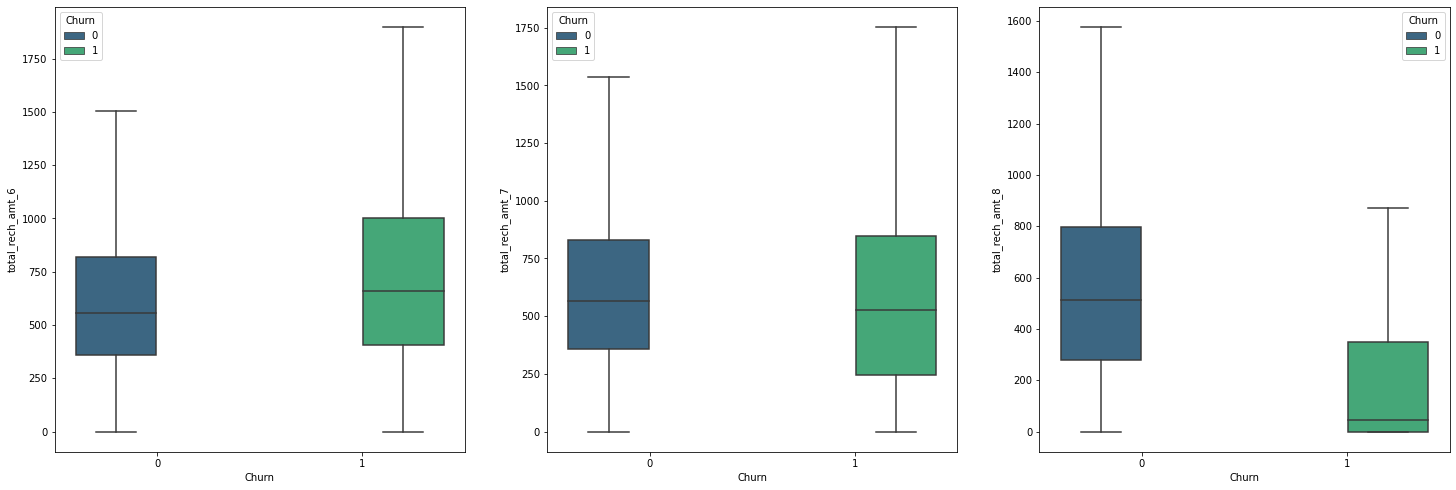

In [32]:
#total recharge amount:
plot_box_chart('total_rech_amt')

INISGHT: THere is a drop in total recharge amount for customers who Churn in the action phase, month 8.

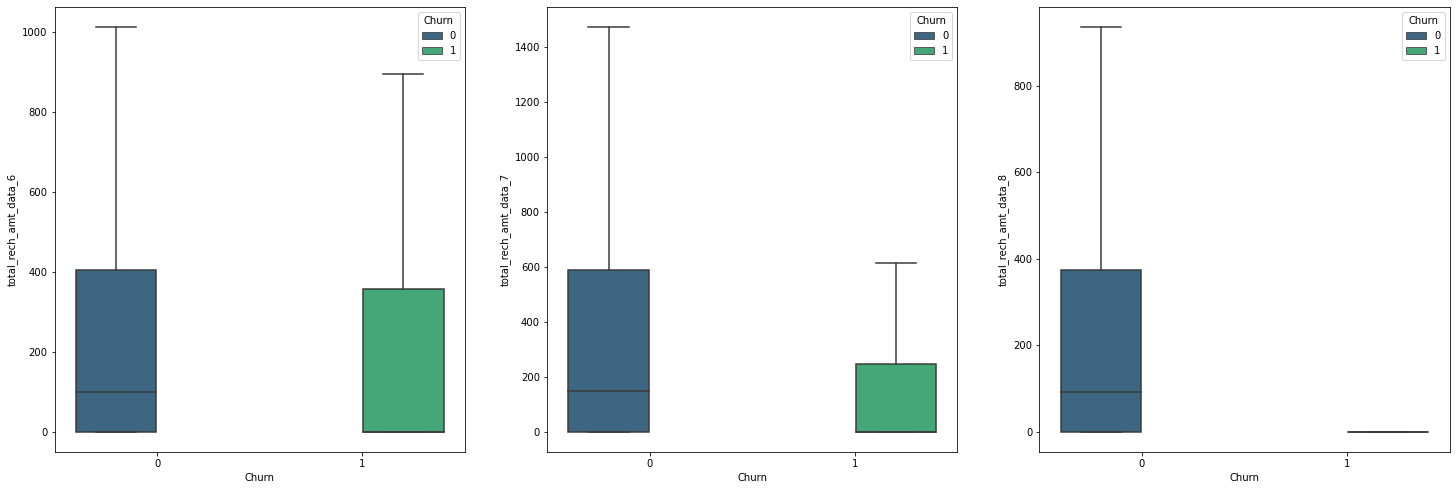

In [33]:
#total recharge amount for data:
plot_box_chart('total_rech_amt_data')

INISGHT: There is a  huge drop in total recharge amount for data for customers who Churn in the action phase, month 8.

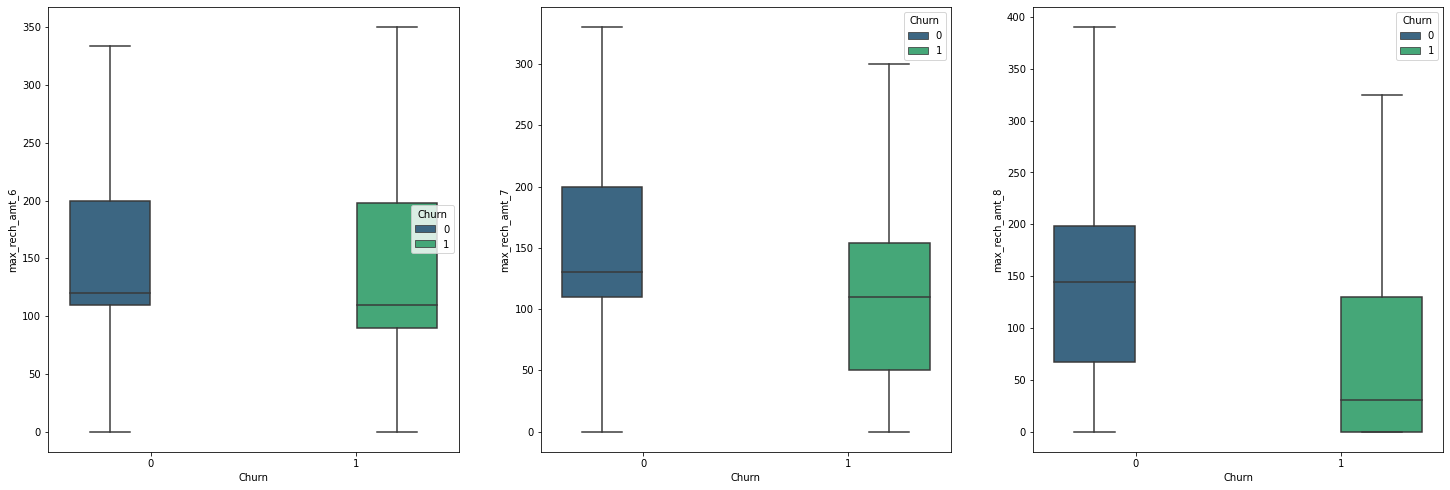

In [34]:
# maximum recharge amount for data:
plot_box_chart('max_rech_amt')

INISGHT: There is a  huge drop in max recharge amount for data for customers who Churn in the action phase, month 8.

In [35]:
#check other recharge related variables:
other_rech = telecom_df_hvc.columns[telecom_df_hvc.columns.str.contains('rech_num|max_rech_data',regex=True)]

In [36]:
# lets check the % of NA values for other recharge related variables
100*telecom_df_hvc.loc[:,other_rech].isnull().sum()/len(telecom_df_hvc)

total_rech_num_6                   0.00
total_rech_num_7                   0.00
total_rech_num_8                   0.00
max_rech_data_6                   44.11
max_rech_data_7                   43.12
max_rech_data_8                   46.80
dtype: float64

In [37]:
telecom_df_hvc.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,"16,740.00","17,038.00","15,935.00"
mean,139.80,140.44,136.35
std,118.89,120.30,119.57
min,1.00,1.00,1.00
25%,25.00,25.00,25.00
50%,152.00,152.00,152.00
75%,198.00,198.00,198.00
max,"1,555.00","1,555.00","1,555.00"


INSIGHT: the min value is 1 while the max is 1555 across months, which indicates the missing values are where no recharges happened for the data, so NaN valuescan be imputed with 0.

In [38]:
telecom_df_hvc.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= telecom_df_hvc.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

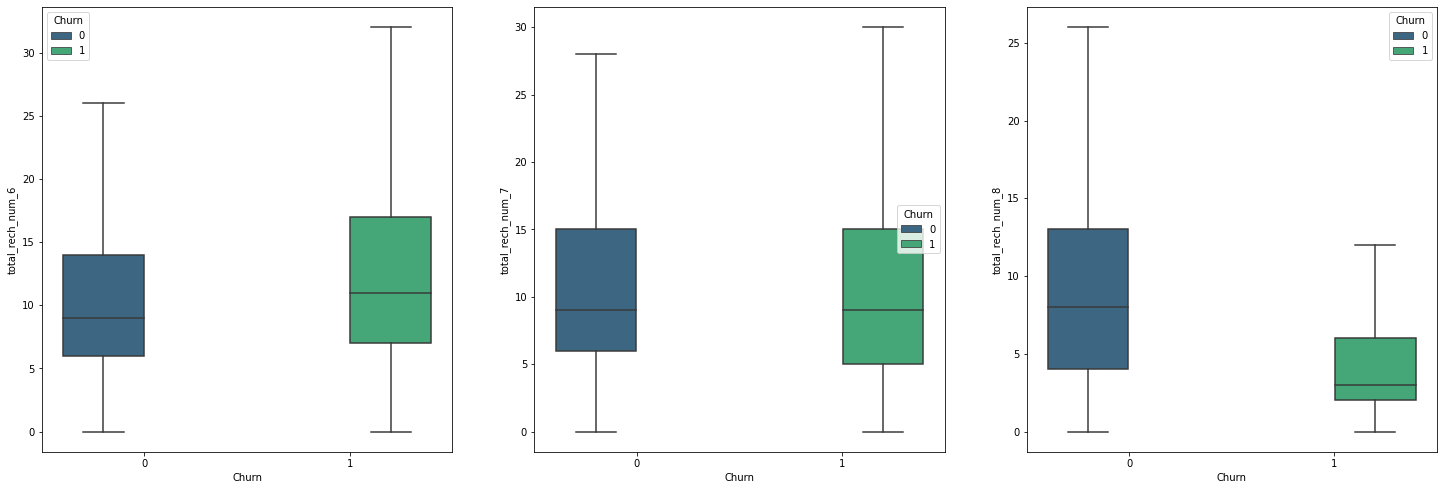

In [39]:
#Total recharge for Number:
plot_box_chart('total_rech_num')

INSIGHT: Tthere is a huge drop in total recharge number in the 8th month (action phase) for customers who Churn.

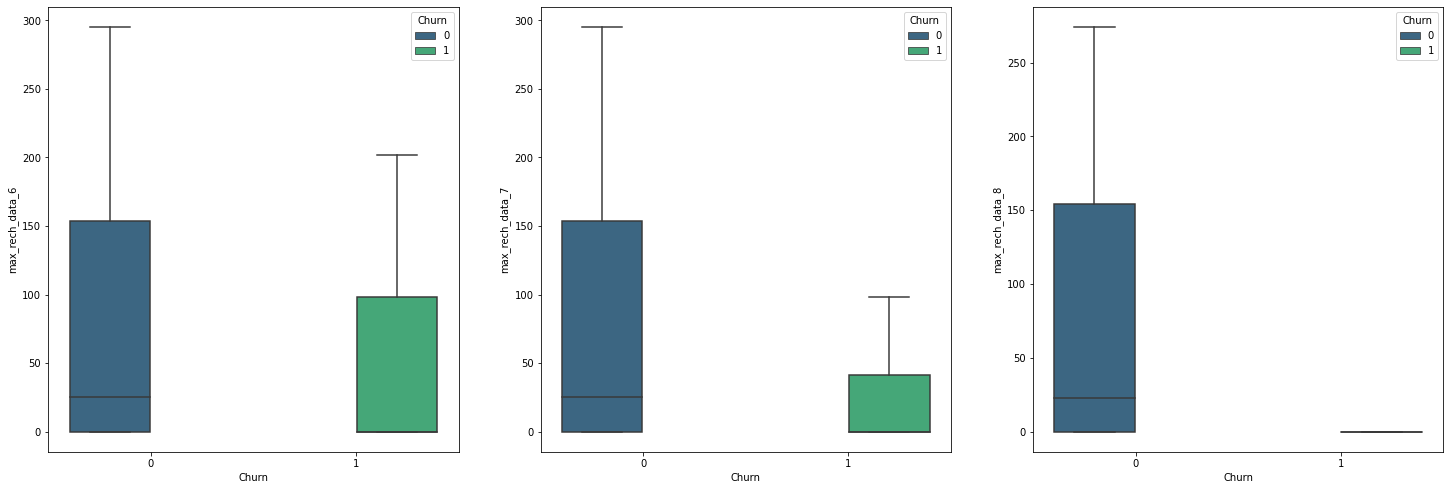

In [40]:
#maximum recharge for data:
plot_box_chart('max_rech_data')

INSIGHT: There is a huge drop in maximum recharge for data in the 8th month (action phase) for customers who Churned.

In [41]:
#Getting the last day recharge amount columns
last_day_rech_amt = telecom_df_hvc.columns[telecom_df_hvc.columns.str.contains('day')]
#display columns
last_day_rech_amt

Index(['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'], dtype='object')

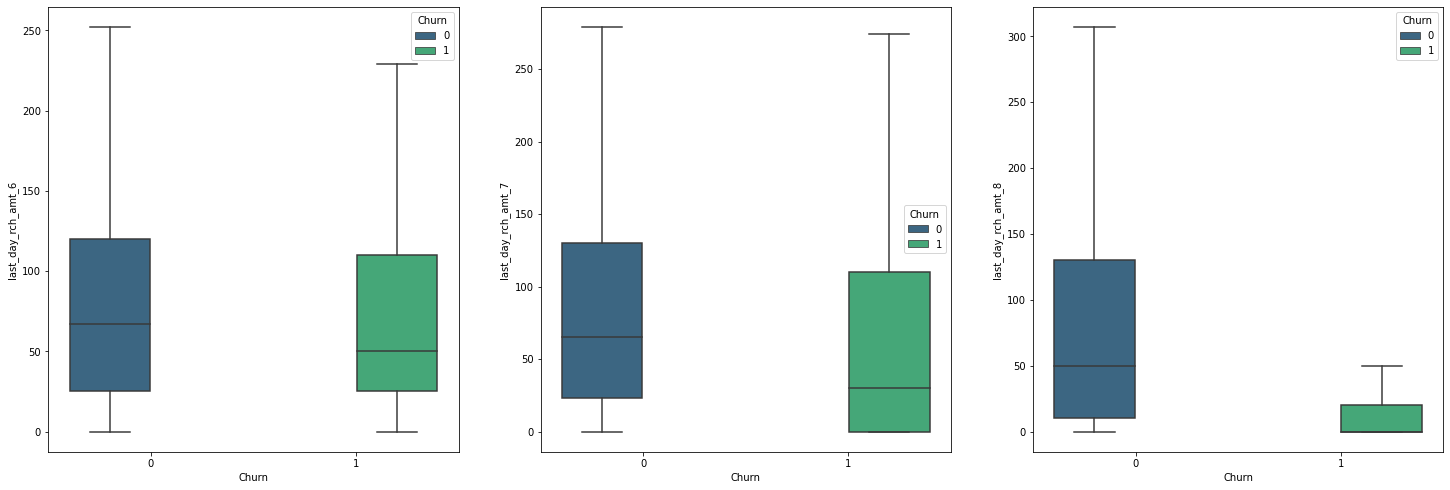

In [42]:
#last day recharge amount:
plot_box_chart('last_day_rch_amt')

INSIGHT: Here also, there is  a huge drop in 8th month recharge amount for customers who Churn .

#### b. 2G and 3G usage related attributes

In [43]:
#finding cols related to 2g and 3g
usage_2g_3g = telecom_df_hvc.columns[telecom_df_hvc.columns.str.contains('2g|3g',regex=True)]

In [44]:
# % of missing values 
perc_3g_2g_null = 100*telecom_df_hvc.loc[:,usage_2g_3g].isnull().sum()/len(telecom_df_hvc.loc[:,usage_2g_3g])
df = pd.DataFrame(perc_3g_2g_null)
df.rename(columns={0:'Missing_Percentage'}, inplace=True)
print(df)

                  Missing_Percentage
count_rech_2g_6                44.11
count_rech_2g_7                43.12
count_rech_2g_8                46.80
count_rech_3g_6                44.11
count_rech_3g_7                43.12
count_rech_3g_8                46.80
vol_2g_mb_6                     0.00
vol_2g_mb_7                     0.00
vol_2g_mb_8                     0.00
vol_3g_mb_6                     0.00
vol_3g_mb_7                     0.00
vol_3g_mb_8                     0.00
arpu_3g_6                      44.11
arpu_3g_7                      43.12
arpu_3g_8                      46.80
arpu_2g_6                      44.11
arpu_2g_7                      43.12
arpu_2g_8                      46.80
monthly_2g_6                    0.00
monthly_2g_7                    0.00
monthly_2g_8                    0.00
sachet_2g_6                     0.00
sachet_2g_7                     0.00
sachet_2g_8                     0.00
monthly_3g_6                    0.00
monthly_3g_7                    0.00
m

INSIGHT: There are 12 columns with more than 40% values missing for count of recharge and average revenue for 2G/3G per user. 
Although we have 2G/3G volume usage based data available, we can drop these columns.

In [45]:
#dropping
telecom_df_hvc.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)
#verifying drop 
telecom_df_hvc.shape

(29953, 152)

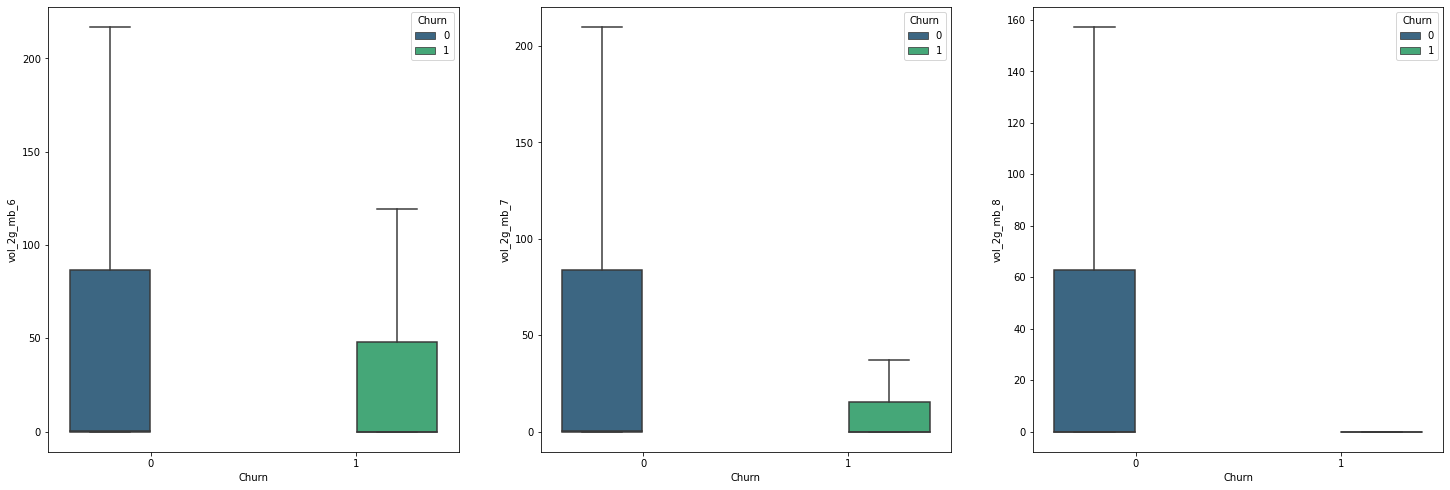

In [46]:
# volume of 2G usage 
plot_box_chart('vol_2g_mb')

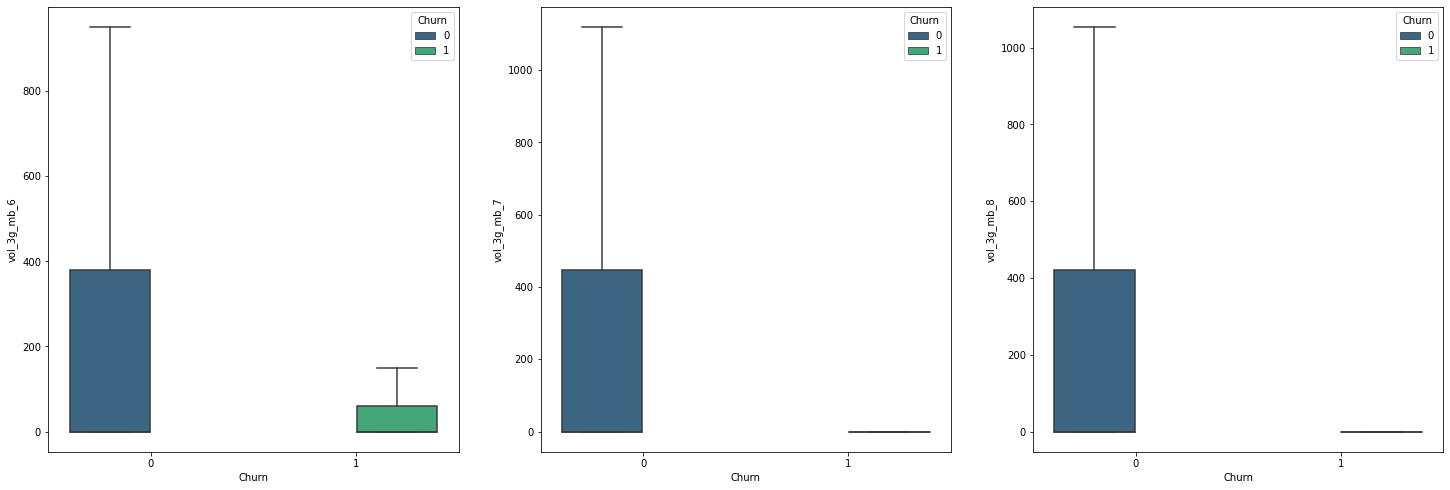

In [47]:
#volume of 3G usage
plot_box_chart('vol_3g_mb')

INSIGHTS: 
1) 2G and 3G usage for customers who Churn drops in the 8th month<br>
2) 2G/3G usage is higher for non-churn customers  which may indicate that churned customers might be from areas where 2G/3G service is not properly available or they don't use these services

In [48]:
#checking monthly 2G/3G service 
monthly_sub_2g_3g = telecom_df_hvc.columns[telecom_df_hvc.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_sub_2g_3g

Index(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8'],
      dtype='object')

In [49]:
#Checking Null value
100*telecom_df_hvc.loc[:,monthly_sub_2g_3g].isnull().sum()/len(telecom_df_hvc.loc[:,monthly_sub_2g_3g])

monthly_2g_6                   0.00
monthly_2g_7                   0.00
monthly_2g_8                   0.00
monthly_3g_6                   0.00
monthly_3g_7                   0.00
monthly_3g_8                   0.00
dtype: float64

In [50]:
telecom_df_hvc[monthly_sub_2g_3g].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   monthly_2g_6  29953 non-null  int64
 1   monthly_2g_7  29953 non-null  int64
 2   monthly_2g_8  29953 non-null  int64
 3   monthly_3g_6  29953 non-null  int64
 4   monthly_3g_7  29953 non-null  int64
 5   monthly_3g_8  29953 non-null  int64
dtypes: int64(6)
memory usage: 2.6 MB


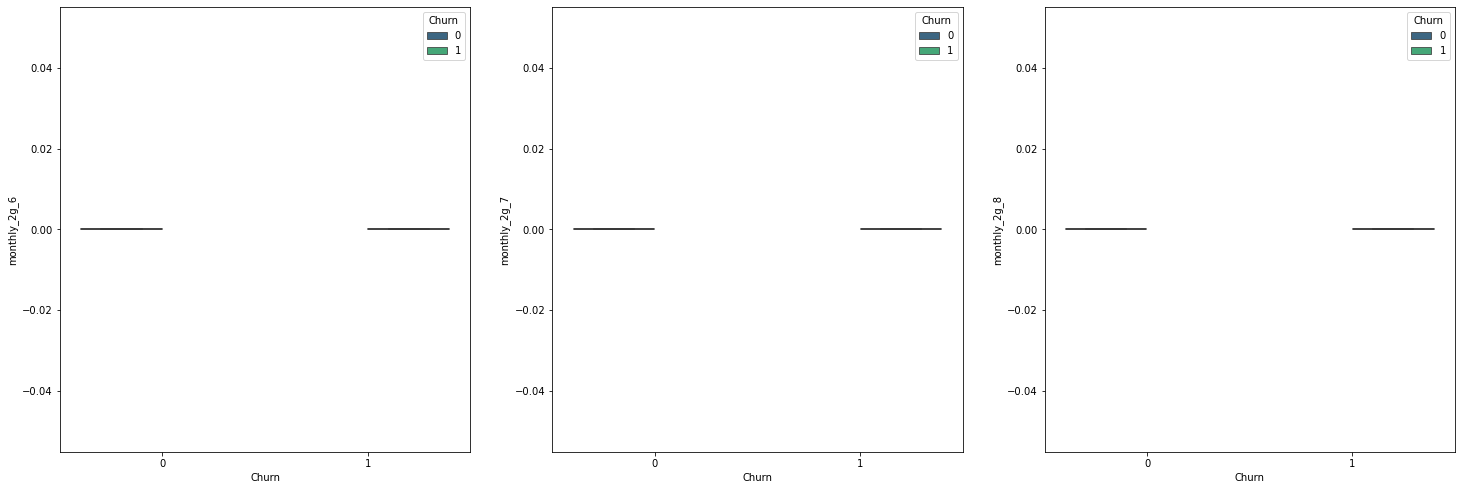

In [51]:
#plotting:
plot_box_chart('monthly_2g')

Insight: Spread is very low, need to check using mean values.

In [52]:
#function for bar plots with  mean values
def plot_mean_bar_chart(df,cols_list):
    df_0 = df[df.Churn==0].filter(cols_list)
    df_1 = df[df.Churn==1].filter(cols_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Churn:0'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn:1'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(12,6),rot=0)
    
    plt.show()
    
    return mean_bar

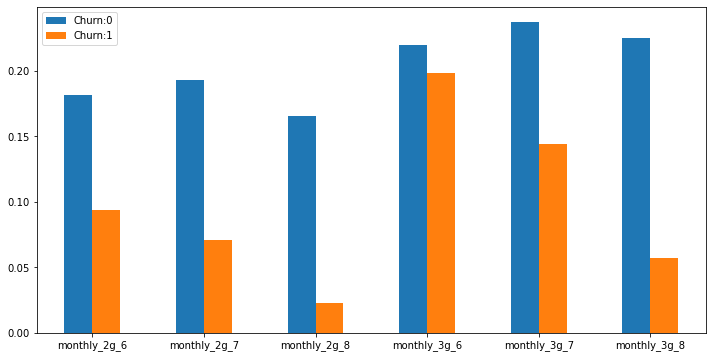

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Churn:0,0.18,0.19,0.17,0.22,0.24,0.22
Churn:1,0.09,0.07,0.02,0.20,0.14,0.06


In [53]:
#plotting
plot_mean_bar_chart(telecom_df_hvc, monthly_sub_2g_3g)

INSIGHT: There is a drop in monthly subscriptions for customers who Churn in 8th Month.

In [54]:
# check Volume based cost 
vbc_column = telecom_df_hvc.columns[telecom_df_hvc.columns.str.contains('vbc_',regex=True)]
vbc_column.tolist()

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [55]:
# renaming month named vbc columns to 6,7,8,9 format
telecom_df_hvc.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column as it is not needed
telecom_df_hvc.drop('vbc_3g_9',axis=1,inplace=True)

In [56]:
vbc_column = telecom_df_hvc.columns[telecom_df_hvc.columns.str.contains('vbc_3g',regex=True)]
vbc_column.tolist()

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

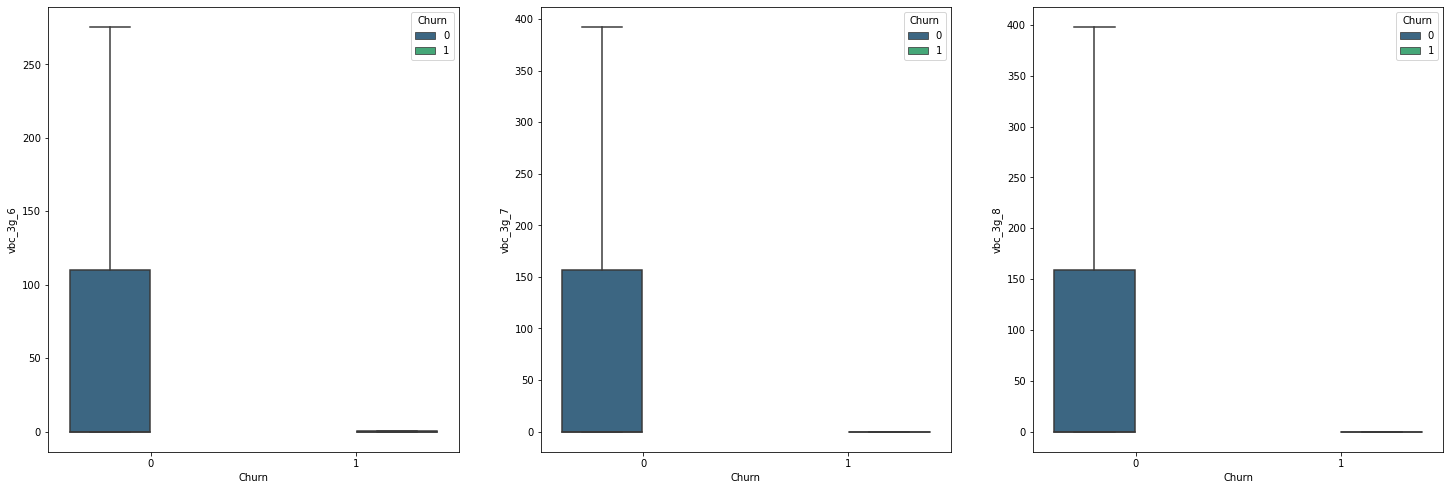

In [57]:
# Plots for volume based cost :
plot_box_chart('vbc_3g')

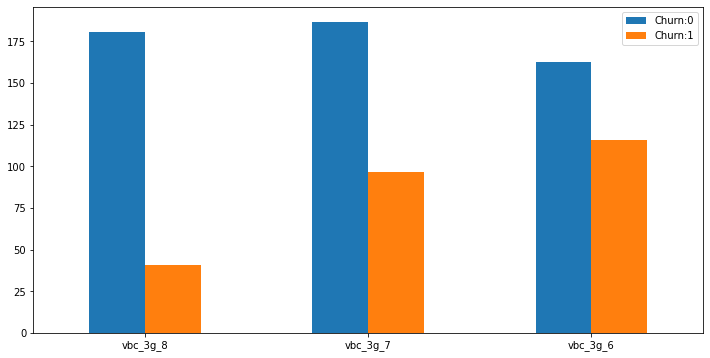

,vbc_3g_8,vbc_3g_7,vbc_3g_6
Churn:0,180.62,186.37,162.56
Churn:1,40.94,96.34,115.46


In [58]:
plot_mean_bar_chart(telecom_df_hvc, vbc_column)

INSIGHTS:
THese plots show that volume based cost for 3G is much lower for Churned customers as compared to Non-Churned and as is the trend so far, there is a drop in vbc in 8th month

In [59]:
# Checking for service schemes with validity smaller than a month for 2G/3G
SC_2g_3g_col = telecom_df_hvc.columns[telecom_df_hvc.columns.str.contains('sachet_2g|sachet_3g',regex=True)]
#displaying
SC_2g_3g_col

Index(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

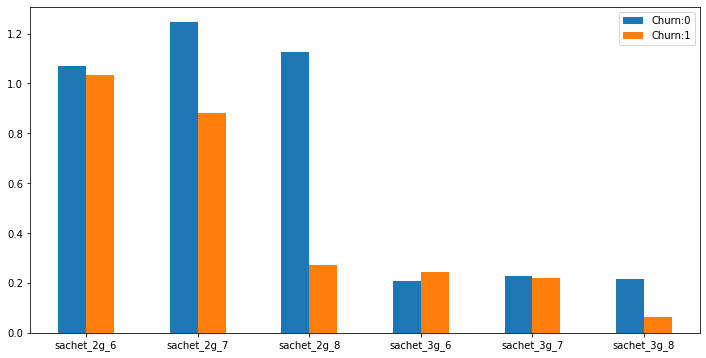

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Churn:0,1.07,1.25,1.13,0.21,0.23,0.21
Churn:1,1.03,0.88,0.27,0.24,0.22,0.07


In [60]:
plot_mean_bar_chart(telecom_df_hvc, SC_2g_3g_col)

INSIGHT: THere is a drop in sachet services in 8th month for cutsomers who Churn

#### d. Average Revenue Per User

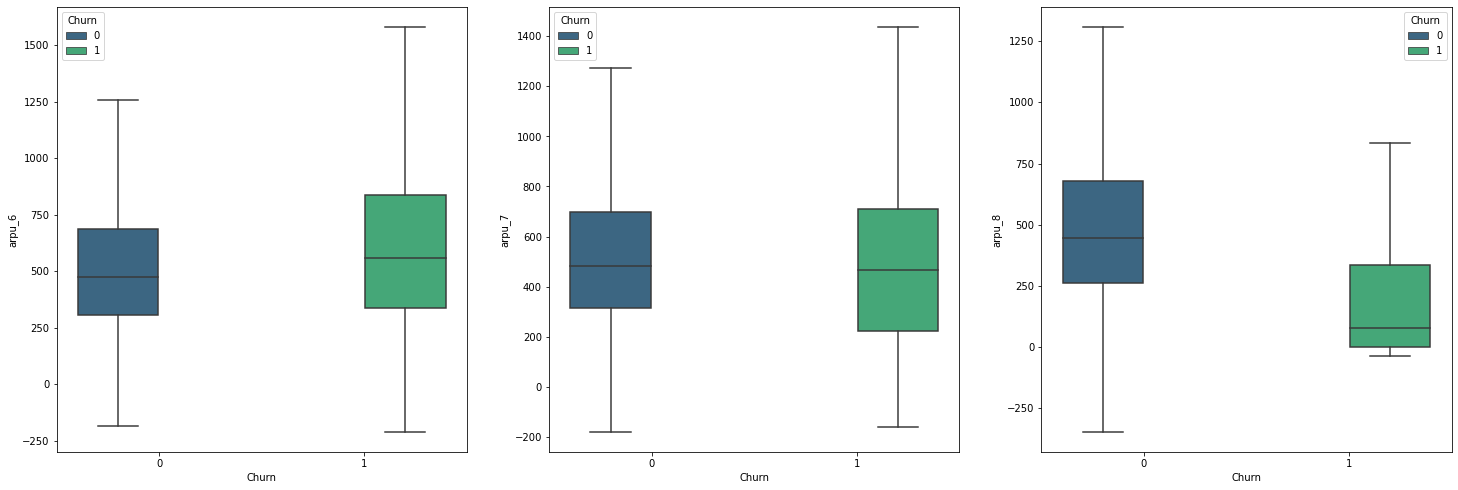

In [61]:
# Checking columns for average revenue per user
arpu_cols = telecom_df_hvc.columns[telecom_df_hvc.columns.str.contains('arpu_')]

# Plotting these
plot_box_chart('arpu')

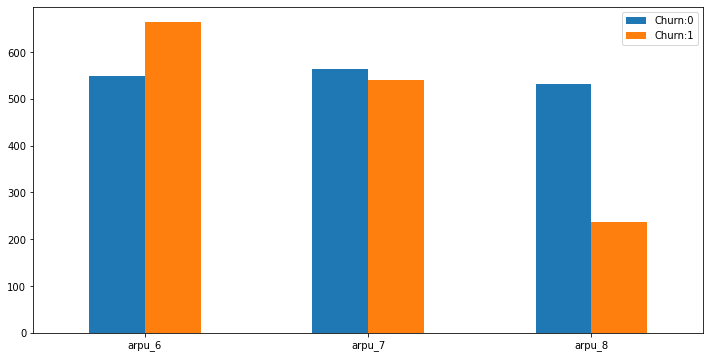

,arpu_6,arpu_7,arpu_8
Churn:0,549.55,562.93,532.87
Churn:1,663.71,541.15,237.66


In [62]:
plot_mean_bar_chart(telecom_df_hvc, arpu_cols)

INSIGHT: THere are huge drops for srpu in 8th month for customers who churn

#### e. Minutes of usage - voice calls

In [63]:
mou_cols = telecom_df_hvc.columns[telecom_df_hvc.columns.str.contains('mou')]
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [64]:
100*(telecom_df_hvc[mou_cols].isnull().sum()/len(telecom_df_hvc[mou_cols]))

onnet_mou_6                        1.81
onnet_mou_7                        1.79
onnet_mou_8                        3.91
offnet_mou_6                       1.81
offnet_mou_7                       1.79
offnet_mou_8                       3.91
roam_ic_mou_6                      1.81
roam_ic_mou_7                      1.79
roam_ic_mou_8                      3.91
roam_og_mou_6                      1.81
roam_og_mou_7                      1.79
roam_og_mou_8                      3.91
loc_og_t2t_mou_6                   1.81
loc_og_t2t_mou_7                   1.79
loc_og_t2t_mou_8                   3.91
loc_og_t2m_mou_6                   1.81
loc_og_t2m_mou_7                   1.79
loc_og_t2m_mou_8                   3.91
loc_og_t2f_mou_6                   1.81
loc_og_t2f_mou_7                   1.79
loc_og_t2f_mou_8                   3.91
loc_og_t2c_mou_6                   1.81
loc_og_t2c_mou_7                   1.79
loc_og_t2c_mou_8                   3.91
loc_og_mou_6                       1.81


INSIGHT: For all these columns missing % is either 1.79,1.81 or 3.91. It could imply that the customer hasn't used these services so we can impute the NaN values with 0.

In [65]:
# replacing NaN values by 0 
telecom_df_hvc.loc[:,mou_cols] = telecom_df_hvc.loc[:,mou_cols].replace(np.NaN,0)

In [66]:
#Checking correlation for month 6
mou_og_col_6 = telecom_df_hvc.columns[telecom_df_hvc.columns.str.contains('.*_og_.*mou_6',regex=True)]
#basic stats
telecom_df_hvc.loc[:,mou_og_col_6].describe()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
count,"29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00"
mean,26.60,84.57,163.31,6.35,1.58,254.24,165.90,179.44,1.81,347.15,2.17,5.83,610.06
std,116.27,228.96,250.22,22.14,6.31,378.55,403.99,409.14,11.99,608.85,45.89,17.58,691.18
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,4.38,19.21,0.00,0.00,32.26,0.00,0.00,0.00,0.40,0.00,0.00,116.64
50%,0.00,24.36,77.26,0.00,0.00,124.59,2.71,16.36,0.00,45.08,0.00,0.23,410.63
75%,0.00,78.06,209.03,4.23,0.00,332.31,109.56,154.54,0.00,465.29,0.00,5.21,859.03
max,"3,775.11","6,431.33","4,729.74","1,466.03",271.44,"10,643.38","7,366.58","8,314.76",628.56,"8,432.99","5,900.66","1,023.21","10,674.03"


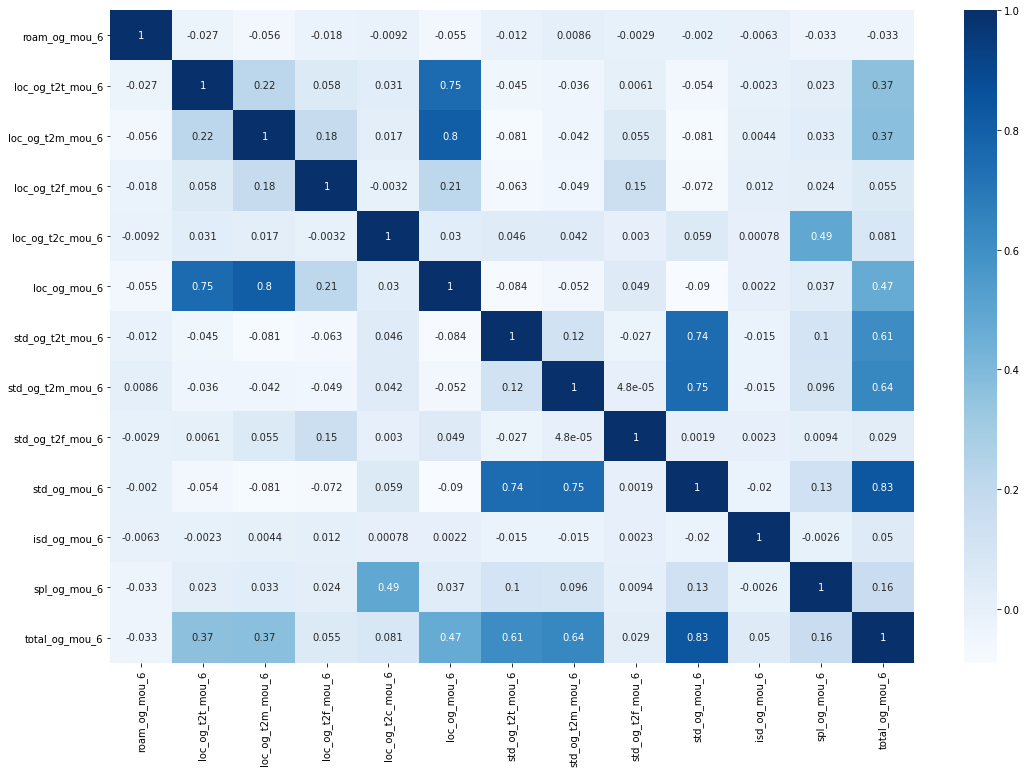

In [67]:
plt.figure(figsize=(18,12))
sns.heatmap(telecom_df_hvc.filter(mou_og_col_6).corr(), cmap="Blues", annot=True)
plt.show()

INSIGHT: total_og_mou_6, std_og_mou_6 and loc_og_mou_6 seem to have strong correlation with other cols and they need to be inspected to avoid any multicollinearity.

In [68]:
telecom_df_hvc[['total_og_mou_6','loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].head()

,total_og_mou_6,loc_og_mou_6,std_og_mou_6,spl_og_mou_6,isd_og_mou_6,og_others_6
0,0.00,0.00,0.00,0.00,0.00,NaN
7,487.53,422.16,60.86,4.50,0.00,0.00
8,508.36,378.09,130.26,0.00,0.00,0.00
21,860.34,97.04,763.29,0.00,0.00,0.00
23,134.38,131.91,2.36,0.10,0.00,0.00


Using the above and the data dicionary we can see that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 is a combination of other variables present in dataset.So we can drop these columns for all months from the data set

In [69]:
#list of cols
list_total_og_cols = telecom_df_hvc.columns[telecom_df_hvc.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
#dropping
telecom_df_hvc.drop(list_total_og_cols,axis=1,inplace=True)
#verifying
telecom_df_hvc.shape

(29953, 142)

In [70]:
#Similarly Checking for incoming mou variables
mou_ic_col_6 = telecom_df_hvc.columns[telecom_df_hvc.columns.str.contains('.*_ic_.*mou_6',regex=True)]

#basic stats
telecom_df_hvc.loc[:,mou_ic_col_6].describe()

,roam_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6
count,"29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00"
mean,16.12,65.51,150.47,15.29,231.28,14.90,29.21,2.70,46.81,290.12,0.06,10.80
std,76.34,163.86,219.32,45.79,315.01,77.75,98.28,19.11,137.60,365.74,0.19,76.79
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,6.10,28.09,0.00,47.91,0.00,0.00,0.00,1.03,72.89,0.00,0.00
50%,0.00,25.08,84.11,1.84,134.56,0.38,5.00,0.00,11.41,183.78,0.00,0.00
75%,0.00,67.48,188.74,11.98,297.26,8.19,23.63,0.11,41.49,372.16,0.00,0.00
max,"2,613.31","6,351.44","4,693.86","1,678.41","7,454.63","5,459.56","4,630.23","1,351.11","5,459.63","7,716.14",19.76,"6,789.41"


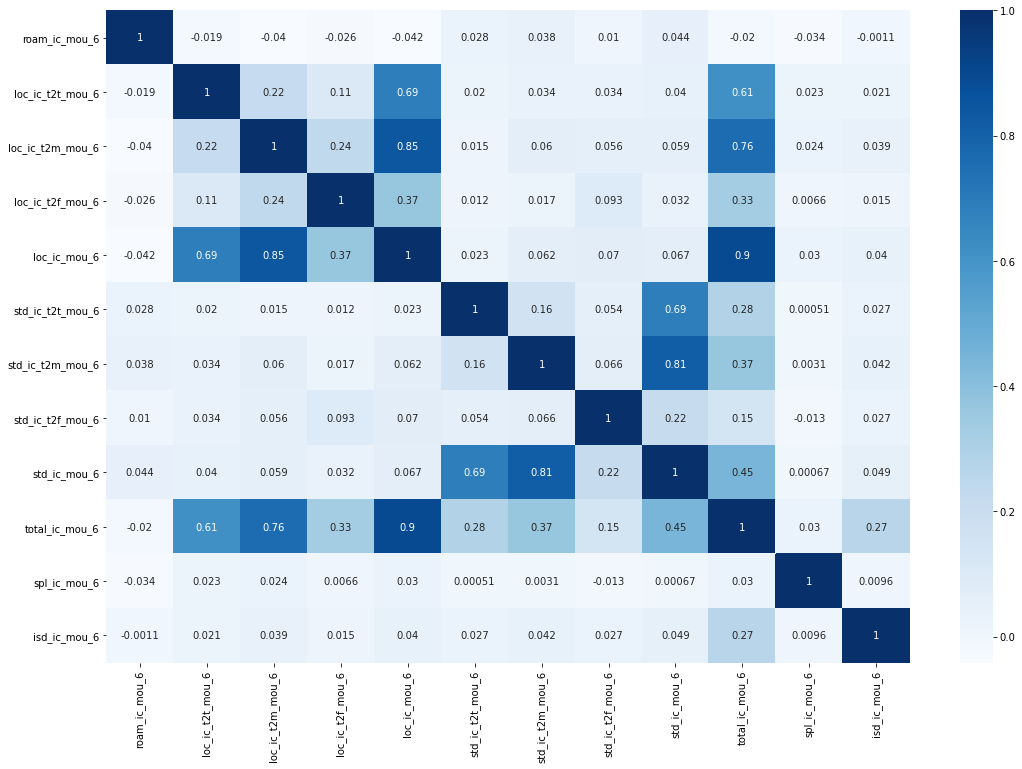

In [71]:
plt.figure(figsize=(18,12))
sns.heatmap(telecom_df_hvc.filter(mou_ic_col_6).corr(), cmap="Blues", annot=True)
plt.show()

INSIGHT: As expected, total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 seem to have strong correlation with other columns and they need to be inspected to avoid multicollinearity 

In [72]:
telecom_df_hvc[['total_ic_mou_6','loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].head(15)

,total_ic_mou_6,loc_ic_mou_6,roam_ic_mou_6,isd_ic_mou_6,spl_ic_mou_6,std_ic_mou_6
0,0.00,0.00,0.00,0.00,0.00,0.00
7,626.46,427.88,16.23,2.06,0.21,180.54
8,103.86,81.43,0.00,0.00,0.00,22.43
21,207.09,125.33,0.00,0.00,0.00,81.76
23,119.58,116.63,0.00,0.00,0.00,2.94
33,7.89,3.48,0.00,0.00,0.00,3.18
38,70.79,46.68,0.00,0.00,0.00,24.11
41,278.31,83.43,0.00,194.31,0.00,0.00
48,"1,250.56","1,212.39",0.00,0.00,0.00,38.16
53,847.78,592.09,0.00,0.53,0.00,255.14


INSIGHT: Using the data dictionary and the above cell,w e can see that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 is a combination of other columns present in dataset. So we can drop these columns for all months from the data set

In [73]:
#making a list of cols
list_total_ic_cols = telecom_df_hvc.columns[telecom_df_hvc.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
#dropping
telecom_df_hvc.drop(list_total_ic_cols,axis=1,inplace=True)
#verifying
telecom_df_hvc.shape

(29953, 133)

#### f. Offnet Usage

In [74]:
offnet_usage_col = telecom_df_hvc.columns[telecom_df_hvc.columns.str.contains('offnet.*mou',regex=True)]
offnet_usage_col.tolist()

['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']

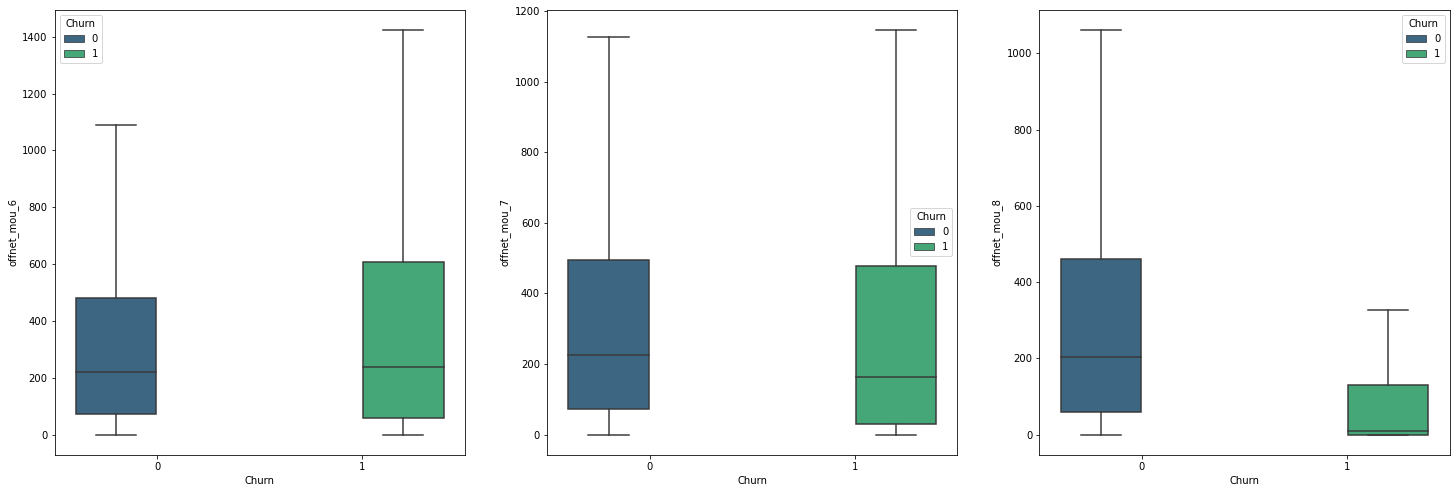

In [75]:
# plotting
plot_box_chart('offnet_mou')

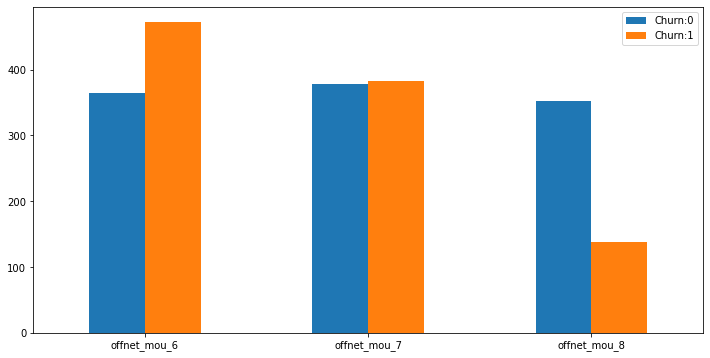

,offnet_mou_6,offnet_mou_7,offnet_mou_8
Churn:0,365.12,377.88,352.50
Churn:1,471.95,382.28,138.52


In [76]:
plot_mean_bar_chart(telecom_df_hvc, offnet_usage_col)

Insight: There is a drop in month 8 for Customemrs who Churn

#### g. ONNET : All kind of calls within the same operator network

In [77]:
#minutes of usage related columns
onnet_usage_col =  telecom_df_hvc.columns[telecom_df_hvc.columns.str.contains('^onnet.*mou',regex=True)]
onnet_usage_col.tolist()

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']

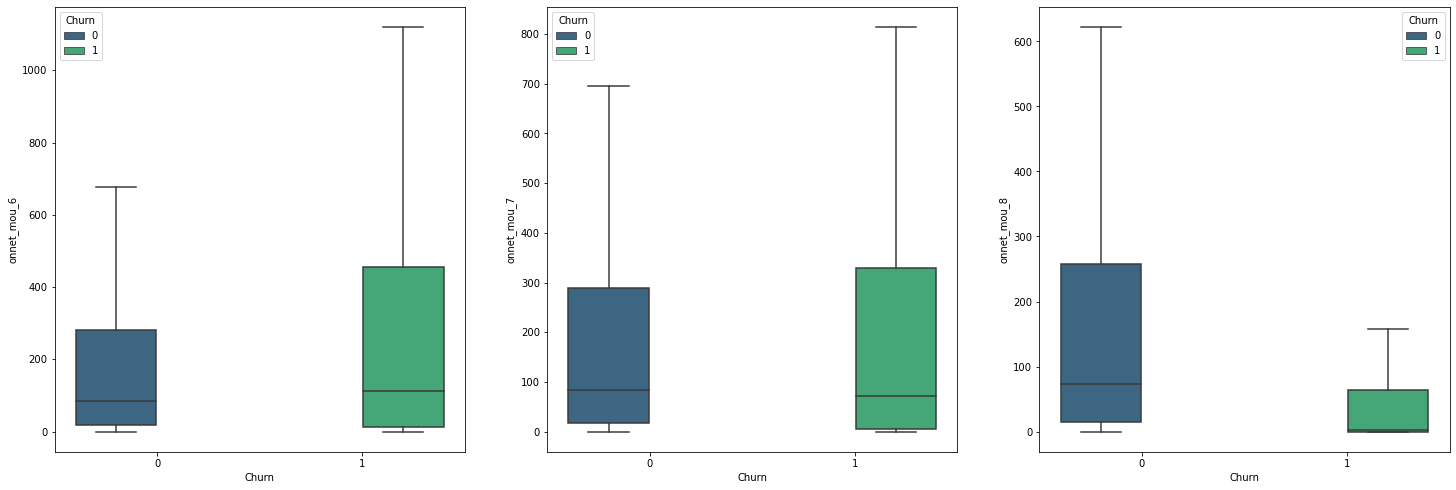

In [78]:
#plotting
plot_box_chart('onnet_mou')

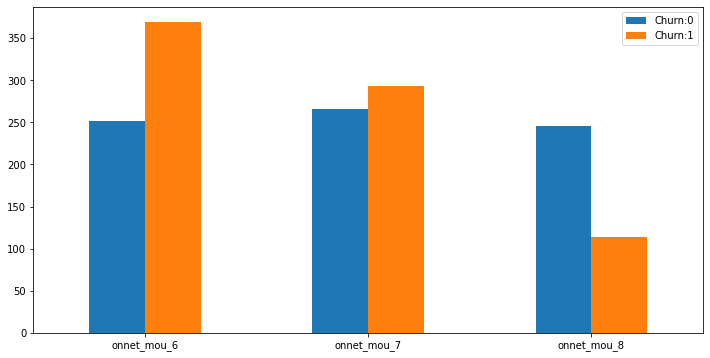

,onnet_mou_6,onnet_mou_7,onnet_mou_8
Churn:0,251.37,265.86,245.03
Churn:1,368.66,292.85,113.48


In [79]:
plot_mean_bar_chart(telecom_df_hvc, onnet_usage_col)

INSIGHT: THere is a drop in Onnet usage in the 8th month for customers who Churn

#### h. Tenure Analysis for Customers  

In [80]:
tenure_df = telecom_df_hvc.copy()

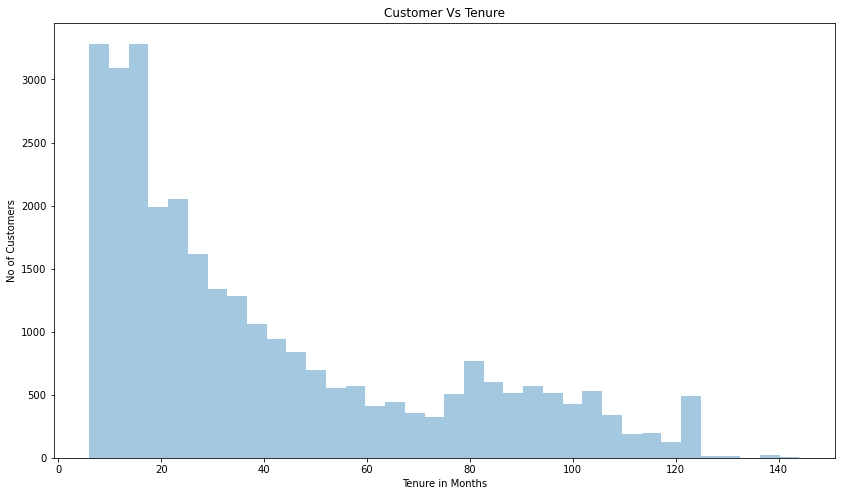

In [81]:
plt.figure(figsize=(14,8))
# we will use aon  col
tenure_df['Tenure'] = tenure_df['aon']/30
tenure_df['Tenure'].head()

ax = sns.distplot(tenure_df['Tenure'], hist=True, kde=False, bins=int(180/5))

ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in Months')

ax.set_title('Customer Vs Tenure')

plt.show()

In [82]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_df['tenure_range'] = pd.cut(tenure_df['Tenure'], tn_range, labels=tn_label)
tenure_df['tenure_range'].head()

0     2-5 Yrs    
7     2-5 Yrs    
8     6-12 Months
21    1-2 Yrs    
23    1-2 Yrs    
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

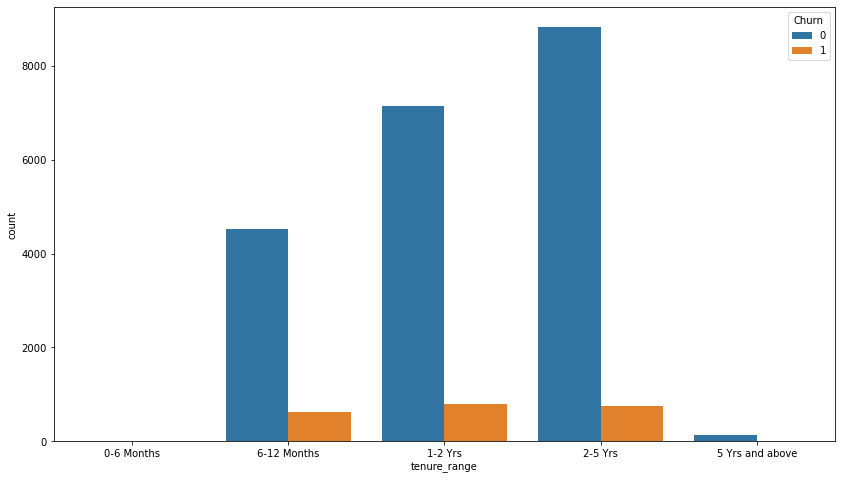

In [83]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'Churn',data = tenure_df)
plt.show()

Insight:
Churn rate decreases as Tenure increases

In [84]:
#checking missing values in the dataset
round((telecom_df_hvc.isnull().sum()/len(telecom_df_hvc)*100),2).sort_values(ascending=False)

fb_user_8                                      46.80
night_pck_user_8                               46.80
date_of_last_rech_data_8                       46.80
night_pck_user_6                               44.11
fb_user_6                                      44.11
date_of_last_rech_data_6                       44.11
fb_user_7                                      43.12
night_pck_user_7                               43.12
date_of_last_rech_data_7                       43.12
og_others_8                                     3.91
ic_others_8                                     3.91
date_of_last_rech_8                             1.94
og_others_6                                     1.81
ic_others_6                                     1.81
og_others_7                                     1.79
ic_others_7                                     1.79
date_of_last_rech_7                             0.33
date_of_last_rech_6                             0.24
total_rech_data_6                             

In [85]:
drop_cols = ['fb_user_8','night_pck_user_8','date_of_last_rech_data_8','night_pck_user_6','fb_user_6','date_of_last_rech_data_6','fb_user_7','night_pck_user_7','date_of_last_rech_data_7']
#Dropping cols with more than 30% missing
telecom_df_hvc.drop(drop_cols,axis=1,inplace=True)
#verifying
telecom_df_hvc.shape

(29953, 124)

In [86]:
#checking missing values in the dataset
round((telecom_df_hvc.isnull().sum()/len(telecom_df_hvc)*100),2).sort_values(ascending=False)

ic_others_8                                     3.91
og_others_8                                     3.91
date_of_last_rech_8                             1.94
ic_others_6                                     1.81
og_others_6                                     1.81
ic_others_7                                     1.79
og_others_7                                     1.79
date_of_last_rech_7                             0.33
date_of_last_rech_6                             0.24
total_rech_data_8                               0.00
total_rech_data_7                               0.00
total_rech_data_6                               0.00
last_day_rch_amt_8                              0.00
max_rech_amt_8                                  0.00
last_day_rch_amt_7                              0.00
last_day_rch_amt_6                              0.00
mobile_number                                   0.00
max_rech_amt_6                                  0.00
max_rech_amt_7                                

In [87]:
#Exploring the above cols
num_col = ['og_others_8', 'ic_others_8', 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7']

In [88]:
telecom_df_hvc[num_col].head()

,og_others_8,ic_others_8,og_others_6,ic_others_6,og_others_7,ic_others_7
0,0.00,0.00,NaN,NaN,NaN,NaN
7,0.00,15.14,0.00,15.74,0.00,15.19
8,0.00,0.00,0.00,0.00,0.00,0.00
21,0.00,0.00,0.00,0.00,0.00,0.00
23,0.00,13.06,0.00,0.00,0.00,5.35


INSIGHT: Replacing NaN values with zero 

In [89]:
for i in num_col:
    telecom_df_hvc.loc[telecom_df_hvc[i].isnull(),i]=0

In [90]:
telecom_df_hvc[num_col].head()

,og_others_8,ic_others_8,og_others_6,ic_others_6,og_others_7,ic_others_7
0,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,15.14,0.00,15.74,0.00,15.19
8,0.00,0.00,0.00,0.00,0.00,0.00
21,0.00,0.00,0.00,0.00,0.00,0.00
23,0.00,13.06,0.00,0.00,0.00,5.35


In [91]:
telecom_df_clean = telecom_df_hvc.copy()
print(telecom_df_clean.shape)
telecom_df_clean.head(3)

(29953, 124)


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amt_6_7_GPhase,Churn
0,7000842753,197.38,214.82,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.00,1.00,1.00,252.00,252.00,252.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,252.00,252.00,252.00,559.00,1
7,7000701601,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.00,0.00,"1,185.00",1
8,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,354.00,207.00,696.00,0


In [92]:
telecom_df_clean.drop(["total_avg_rech_amt_6_7_GPhase"],axis=1,inplace=True)
telecom_df_clean.drop(telecom_df_hvc.filter(regex='date_').columns,axis=1,inplace=True)
print (telecom_df_clean.shape)

col_list = telecom_df_clean.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    telecom_df_clean[avg_col_name] = (telecom_df_clean[col_6]  + telecom_df_clean[col_7])/ 2


(29953, 120)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g
total_rech_amt_data


In [93]:
cols_drop = telecom_df_clean.filter(regex='_6|_7')
telecom_df_clean.drop(cols_drop,axis=1,inplace=True)
print (telecom_df_clean.shape)

(29953, 81)


In [94]:
telecom_df_clean.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_amt_data_8,Churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,7000842753,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,4.13,1.15,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,1.00,252.00,252.00,5.75,109.61,0,0,1,0,968,30.40,252.00,1,206.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.50,307.00,252.00,252.00,1.00,252.00,252.00,15.72,117.16,0.00,0.00,1.00,0.00,50.60,252.00
7,7000701601,"3,171.48",52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,12.01,49.14,16.68,10.01,6.50,0.00,27.31,121.19,39.53,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0,0,0,0,802,57.74,0.00,1,"1,209.51",56.26,510.29,24.86,18.16,41.38,378.00,58.64,0.00,13.79,40.83,13.37,0.09,2.25,0.00,45.20,219.53,126.81,24.36,109.22,43.22,0.10,8.29,15.46,5.00,"1,185.00","1,185.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.06,0.00
8,7001524846,137.36,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,22.58,75.69,0.00,0.00,10.23,0.00,0.31,15.48,0.00,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,3.00,23.00,69.00,0.03,11.94,0,3,0,0,315,21.03,207.00,0,435.47,382.36,87.64,0.00,0.00,257.36,75.77,0.00,0.00,125.00,11.86,0.00,0.00,0.00,0.00,16.84,35.78,0.00,0.29,13.25,0.00,0.00,0.00,0.00,20.00,519.00,122.00,25.00,1.00,77.00,88.50,178.00,375.48,0.50,0.50,0.00,0.00,516.40,177.00
21,7002124215,637.76,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,61.79,876.99,0.00,0.00,0.00,0.00,19.54,129.16,10.39,0.18,101.74,0.00,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0,0,0,0,720,0.00,0.00,0,556.10,117.26,827.30,0.00,0.00,5.32,89.87,0.38,0.00,111.94,737.05,0.00,0.00,0.00,0.00,6.33,96.43,3.73,10.02,52.96,0.00,0.00,0.00,0.00,24.00,640.00,50.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
23,7000887461,366.97,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,0.00,39.61,0.00,0.00,17.71,0.00,76.64,146.84,0.71,13.38,43.91,0.00,0.00,3.74,13.06,4,439,179,0,2.00,179.00,270.00,0.01,"1,009.92",0,0,1,1,604,40.45,540.00,0,134.12,49.81,87.38,0.00,0.00,49.81,82.97,0.00,0.00,0.00,4.35,0.00,0.01,0.05,0.00,40.88,104.63,0.00,0.26,8.66,0.00,0.00,14.12,2.67,4.00,227.00,89.50,89.50,1.00,89.50,178.00,0.24,299.55,0.00,0.00,1.00,0.00,25.93,356.00


NOTE: To reduce the  number of features  we merged most of the cols for 6 and 7 by taking the average of them. This results in a col drop of 120 to 81.

## Model Building

In [97]:
X = telecom_df_clean.drop(["Churn","mobile_number"],axis=1)

y = telecom_df_clean[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20967, 79)
(20967, 1)
(8986, 79)
(8986, 1)


In [98]:
# Normalize the data
scaler = RobustScaler()

scaled_data = scaler.fit_transform(X_train)

X_train = pd.DataFrame(data = scaled_data, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

In [112]:
#Handling class imbalance using SMOTEENN
def implement_smoteenn(X_train, y_train):
    
    sampling = SMOTEENN(random_state = 100)
    X_train_resampled, y_train_resampled = sampling.fit_resample(X_train.values, y_train.values.ravel())

    # Shuffle the data
    perms = np.random.permutation(X_train_resampled.shape[0])
    X_train_resampled = X_train_resampled[perms]
    y_train_resampled = y_train_resampled[perms]

    X_train_resampled = pd.DataFrame(data = X_train_resampled)
    y_train_resampled = pd.DataFrame(data = y_train_resampled)

    print(X_train_resampled.shape)
    print(y_train_resampled.shape)
    
    return X_train_resampled, y_train_resampled

In [100]:
# Custom Function for ensembling classifiers using sampling and then Shuffling the data

def transform(transformer, X, y):
    
    print("Transforming {}".format(transformer.__class__.__name__))
    
    X_resampled, y_resampled = transformer.fit_sample(X.values, y.values.ravel())
    
    # Shuffle the data
    perms = np.random.permutation(X_resampled.shape[0])
    X_resampled = X_resampled[perms]
    y_resampled = y_resampled[perms]
    
    # Return the classifier, X_resampled and y_resampled
    return transformer.__class__.__name__, pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)

In [101]:
# Custom Function to Apply transformations to dataset

def apply_transformations(dataset, X_train, y_train):
    
    dataset.append(("base", X_train, y_train))
    
    dataset.append(transform(SMOTE(n_jobs = -1, random_state = 100), X_train, y_train))
    
    dataset.append(transform(RandomOverSampler(random_state = 100), X_train, y_train))
    
    dataset.append(transform(NearMiss(n_jobs = -1, random_state = 100), X_train, y_train))

    dataset.append(transform(RandomUnderSampler(random_state = 100), X_train, y_train))

    dataset.append(transform(SMOTEENN(random_state = 100), X_train, y_train))

    dataset.append(transform(SMOTETomek(random_state = 100), X_train, y_train))
    
    return dataset

In [117]:
# Custom Function to get Scores and plots
def get_scores(scores, reg, X_test):
    
    # Plot ROC and PR curves using all models and test data
    fig, axes = plt.subplots(1, 2, figsize = (14, 6))

    pred_test = reg.predict(X_test.values)

    pred_test_probs = reg.predict_proba(X_test.values)[:, 1:]

    fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
    p, r, t = precision_recall_curve(y_test.values.ravel(), pred_test_probs)

    model_f1_score = f1_score(y_test.values.ravel(), pred_test)
    model_precision_score = precision_score(y_test.values.ravel(), pred_test)
    model_recall_score = recall_score(y_test.values.ravel(), pred_test)
    model_accuracy_score = accuracy_score(y_test.values.ravel(), pred_test)
    model_auc_roc = auc(fpr, tpr)
    model_auc_pr = auc(p,r, reorder=True)

    scores.append((model_f1_score,
                   model_precision_score,
                   model_recall_score,
                   model_accuracy_score,
                   model_auc_roc,
                   model_auc_pr,
                   confusion_matrix(y_test.values.ravel(), pred_test)))

    axes[0].plot(fpr, tpr, label = f"auc_roc = {model_auc_roc:.3f}")
    axes[1].plot(r, p, label = f"auc_pr = {model_auc_pr:.3f}")

    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("AUC ROC curve")

    axes[1].legend(loc = "lower right")
    axes[1].set_xlabel("recall")
    axes[1].set_ylabel("precision")
    axes[1].set_title("PR curve")

    plt.tight_layout()
    plt.show()
    
    return scores

In [103]:
# Custom Function for Model Building

def model(sampling_type, X, y, param_grid, model_type, ml = 'None'):
    
    model_type_list = ['Logistic', 'SVM', 'Decision Tree', 'Random Forest', 'Adaboost', 'XGBoost', 'LightGBM']
    
    if model_type == 'Logistic':
    
        ml = LogisticRegression(penalty = 'l2', C = 10, n_jobs = -1, random_state = 100)
    
    elif model_type == 'SVM':
        
        ml = SVC(C = 1000, kernel = 'rbf', probability = True, random_state = 100)
    
    elif model_type == 'Decision Tree':
        
        ml = DecisionTreeClassifier(max_depth = 7, min_samples_split = 26, min_samples_leaf = 46, random_state = 100)
    
    elif model_type == 'Random Forest':
        
        ml = RandomForestClassifier(n_estimators = 900, max_depth = 29, min_samples_split = 2, min_samples_leaf = 1,
                                    n_jobs = -1, random_state = 100)
    
    elif model_type == 'Adaboost':
        
        dt = DecisionTreeClassifier(max_depth = 17, min_samples_split = 3, min_samples_leaf = 1, random_state = 100)

        ml = AdaBoostClassifier(base_estimator = dt, n_estimators = 300, learning_rate = 0.3, random_state = 100)
    
    elif model_type == 'XGBoost':
        
        ml = XGBClassifier(max_depth = 18, learning_rate = 0.3, n_estimators = 900, min_child_weight = 1,
                           subsample = 0.9, colsample_bytree = 0.4, n_jobs = -1, random_state = 100)
    
    elif model_type == 'LightGBM':
        
        ml = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600,
                            min_child_samples = 20, subsample = 0.1, colsample_bytree = 1,
                            objective = 'binary', n_jobs = -1, random_state = 100)
    
    if model_type not in model_type_list:
        
        gc = GridSearchCV(estimator = ml, param_grid = param_grid, scoring = 'roc_auc',
                          n_jobs = 15, cv = 5, verbose = 2)
    
    else:
        
        gc = ml
    
    gc = gc.fit(X.values, y.values.ravel())
    
    if model_type in model_type_list:
        
        return sampling_type, gc
    
    else:
        
        return gc

In [104]:
# Custom Function to plot GridSearch Result to get the best value

def hypertuning_plot(scores, parameter):
    
    col = "param_" + parameter
    
    plt.figure()
    
    plt.plot(scores[col], scores["mean_train_score"], label = "training accuracy")
    plt.plot(scores[col], scores["mean_test_score"], label = "test accuracy")
    
    plt.xlabel(parameter)
    plt.ylabel("Accuracy")
    
    plt.legend()
    plt.show()

In [105]:
# Custom Function to Train/evaluate models for each of tranformed datasets

def evaluate_train(scores, benchmark_scores, dataset, X_test):
    
    # Plot ROC and PR curves using all models and test data
    fig, axes = plt.subplots(1, 2, figsize = (14, 6))

    # train models based on benchmark params
    for sampling_type, reg in benchmark_scores:

        print("Training on {}".format(sampling_type))

        for s_type, X, y in dataset:

            if s_type == sampling_type:

                pred_test = reg.predict(X_test.values)

                probs = reg.predict_proba(X_test.values)[:, 1:]

                fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
                p, r, t = precision_recall_curve(y_test.values.ravel(), probs)

                model_f1_score = f1_score(y_test.values.ravel(), pred_test)
                model_precision_score = precision_score(y_test.values.ravel(), pred_test)
                model_recall_score = recall_score(y_test.values.ravel(), pred_test)
                model_accuracy_score = accuracy_score(y_test.values.ravel(), pred_test)
                model_auc_roc = auc(fpr, tpr)
                model_auc_pr = auc(p, r, reorder = True)

                scores.append((sampling_type,
                               model_f1_score,
                               model_precision_score,
                               model_recall_score,
                               model_accuracy_score,
                               model_auc_roc,
                               model_auc_pr,
                               confusion_matrix(y_test.values.ravel(), pred_test)))

                axes[0].plot(fpr, tpr, label = f"{s_type}, auc_roc = {model_auc_roc:.3f}")
                axes[1].plot(r, p, label = f"{s_type}")

    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("AUC ROC curve")

    axes[1].legend()
    axes[1].set_xlabel("recall")
    axes[1].set_ylabel("precision")
    axes[1].set_title("PR curve")

    plt.tight_layout()
    plt.show()
    
    return scores

In [106]:
def get_different_sampling_type_results(regression_type, X_test):
    
    # Apply Logistic Regression with on Different Sampling Types

    benchmark_scores = []
    
    param_grid = {}

    for sample_type, X, y in dataset:

        print('Performing {}'.format(sample_type))

        benchmark_scores.append(model(sample_type, X, y, param_grid, regression_type))
    
    print(' ')
    
    # Train/evaluate models for each of tranformed datasets
    scores = []

    scores = evaluate_train(scores, benchmark_scores, dataset, X_test)

    # Tabulate results
    sampling_results = pd.DataFrame(scores, columns = ['Sampling Type', 'f1', 'precision', 'recall', 'accuracy',
                                                       'auc_roc', 'auc_pr', 'confusion_matrix'])
    
    return sampling_results

### PCA Dimension Reduction 

In [107]:
def perform_PCA(X):
    
    pca = PCA(svd_solver = 'randomized', random_state = 100)

    #Doing the PCA on the train data
    pca.fit(X)
    
    # Making the screeplot - plotting the cumulative variance against the number of components
    fig = plt.figure(figsize = (12,8))

    plt.plot(np.cumsum(pca.explained_variance_ratio_))

    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

In [108]:
def perform_incremental_PCA(X_train, y_train, components):
    
    # Using incremental PCA for efficiency - saves a lot of time on larger datasets

    pca_final = IncrementalPCA(n_components = components)

    X_train_pca = pca_final.fit_transform(X_train)
    X_test_pca = pca_final.transform(X_test)

    X_train_pca = pd.DataFrame(data = X_train_pca)
    X_test_pca = pd.DataFrame(data = X_test_pca)

    print(X_train_pca.shape)
    print(y_train.shape)
    print(X_test_pca.shape)
    print(y_test.shape)
    
    #creating correlation matrix for the principal components
    corrmat = np.corrcoef(X_train_pca.transpose())

    #plotting the correlation matrix
    plt.figure(figsize = (20,10))
    sns.heatmap(corrmat, annot = True)
    plt.show()
    
    # 1s -> 0s in diagonals
    corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
    print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
    # we see that correlations are indeed very close to 0
    
    return X_train_pca, X_test_pca

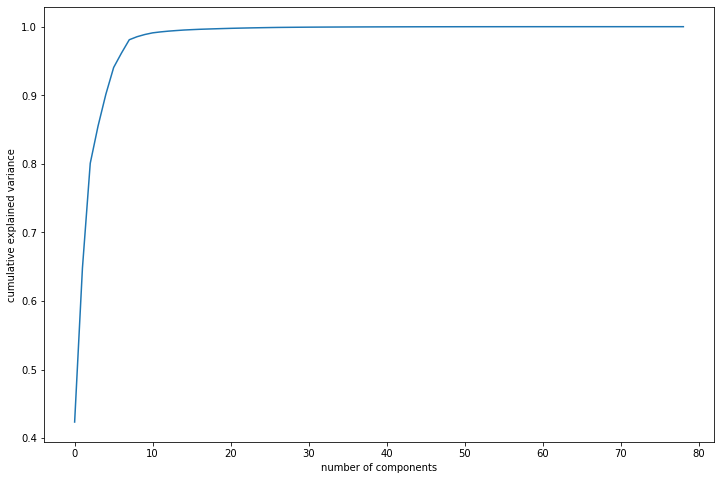

In [109]:
perform_PCA(X_train)

Looks like 6 components are enough to describe 95% of the variance in the dataset. Let's choose 6 components for modeling.

(20967, 6)
(20967, 1)
(8986, 6)
(8986, 1)


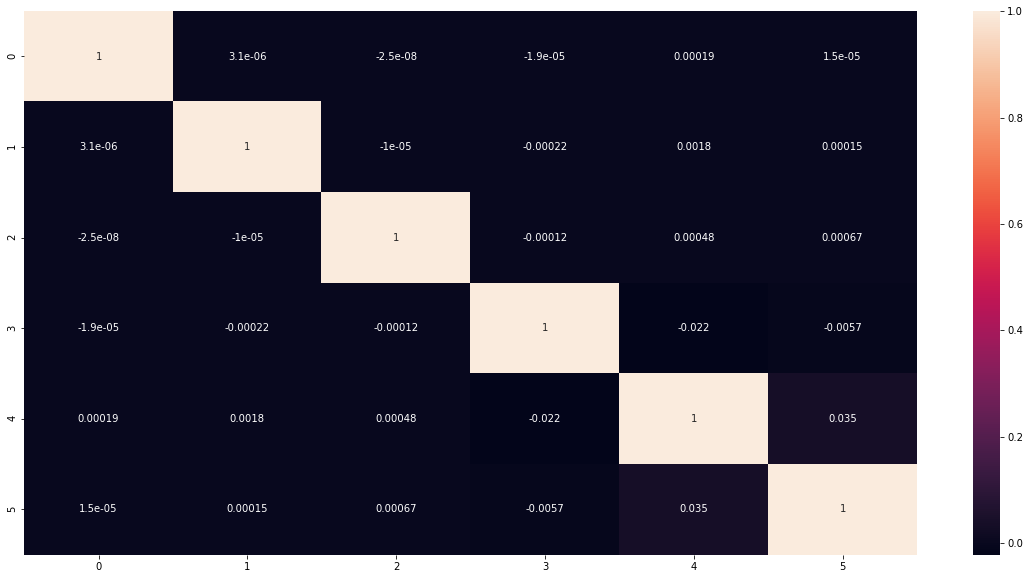

max corr: 0.035025706965471866 , min corr:  -0.021508398880167142


In [110]:
X_train_pca, X_test_pca = perform_incremental_PCA(X_train, y_train, 6)

No correlation b/w any 2 components. Now's lets handle class imbalance

In [113]:
# Implement SMOTEENN
X_train_resampled, y_train_resampled = implement_smoteenn(X_train_pca, y_train)

(28536, 6)
(28536, 1)


### Logistic Regression

ValueError: x is neither increasing nor decreasing : [0.07608939 0.07598614 0.07599464 ... 0.5        1.         1.        ].

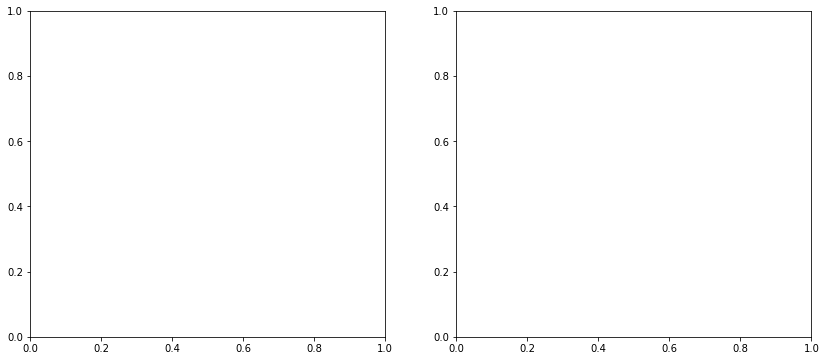

In [116]:
# Logistic Regression with Default Parameters

lr = LogisticRegression(n_jobs = -1, random_state = 100)

lr = lr.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lr, X_test_pca)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

#### Logistic Regression Hyperparameter tuning

In [118]:
# GridSearchCV to find best penalty

lr = LogisticRegression(n_jobs = -1, random_state = 100)

parameter = 'penalty'

# parameters to build the model on
param_grid = {parameter: ['l1', 'l2']}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lr)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


KeyError: 'mean_train_score'

<Figure size 432x288 with 0 Axes>

In [120]:
# GridSearchCV to find best C

# Penalty remains the same and hence any penalty method (l1 or l2) can be taken into consideration.

lr = LogisticRegression(penalty = 'l2', n_jobs = -1, random_state = 100)

parameter = 'C'

# parameters to build the model on
param_grid = {parameter: [1, 10, 100, 1000]}

gc = model('SMOTEENN', X_train_resampled, y_train_resampled, param_grid, 'Individual', lr)
    
# scores of GridSearch CV
scores = gc.cv_results_

# Plot the scores
#hypertuning_plot(scores, parameter)

# Get the best value
gc.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'C': 1}

TypeError: auc() got an unexpected keyword argument 'reorder'

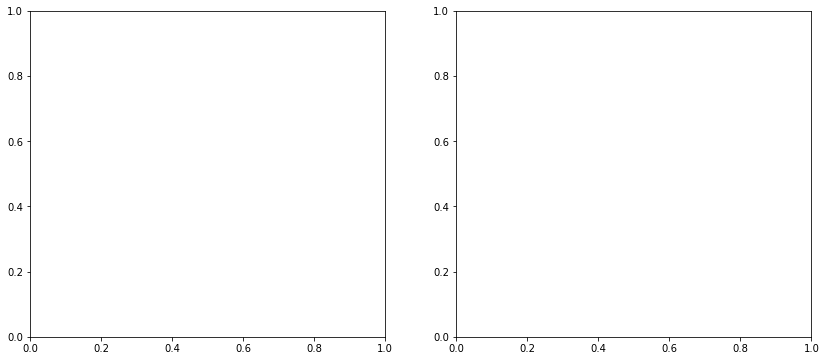

In [121]:
# Logistic with best parameters obtained from grid search

lr = LogisticRegression(penalty = 'l2', C = 10, n_jobs = -1, random_state = 100)

lrf = lr.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lrf, X_test_pca)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

In [122]:
# Apply Class Imbalance transformations to dataset

dataset = []

dataset = apply_transformations(dataset, X_train_resampled, y_train_resampled)

Transforming SMOTE


AttributeError: 'SMOTE' object has no attribute 'fit_sample'

## Recommendations
### Business Insights 
- Less number of high value customers are churing but for last 6 months no new high valued cusotmer is onboarded which is concerning and company should concentrate on 
- Customers with less than 4 years of tenure are more likely to churn and the Company should focus more on this segment to lower Churn rate. This could be done by introducing new schemes/services to this segment
- Avg revenue per user is the most important feature for predicting Churn
- Incoming and Outgoing Calls on roaming in the 8th month are also very strong indicators of Churn 
- 2G/3G area coverage is another strong indicator of Churn 
- Local Outgoing Calls is also another predictor of Churn 

### Model Insights 
- Based on the summary df below:
    - Random Forest with hpyerparamter tuning worked the best
    - DT 
    - Logistic Regression 

In [161]:
consolidate_summary.head(10)

,Model,Accuracy,Precision,Recall,AUC,F1
0,SVM (Default)-linear,0.83,0.79,0.30,0.81,0.43
1,SVM (Default)-rbf,0.87,0.74,0.36,0.81,0.49
2,SVM( rfb ) [Hyper],0.92,0.48,0.49,0.72,0.49
3,RandomForest (Default),0.91,0.49,0.45,0.72,0.47
4,RandomForest (Hyper),0.90,0.66,0.41,0.79,0.51
5,XGBoost (Default),0.85,0.75,0.33,0.81,0.45
6,XGBoost (Hyper Tuned),0.84,0.75,0.31,0.80,0.44
